Link [colab notebook](https://colab.research.google.com/drive/1yf52EZoI_PyhvpWWuTGAFHo1hcX00NiO?usp=sharing).

## Background
**Notations.** A neural network with $l$ layer, each layer $i^{th}$ is specified by a weight matrix $W^i$. After each layer is a non-linear activation function, which we denote $\sigma(\cdot)$. For some input (column) vector $x$, the output of the neural network can be written as
$$y = S(W^l \sigma(W^{l-1}\sigma(W^{l-2}\dots\sigma(W^1x)))) \tag{1}$$
S is the softmax function, $\sigma$ can be any of the activation functions: sigmoid, tanh, relu. For convenience, the letter $a^i$ denote the non-activated output of the $i^{th}$ layer and $h^i=\sigma(a^i)$ their non-linear activated output.

Any vector is assumed to be column vectors unless stated otherwise. For a vector $v$, $v_i$ is the entry at the position $i^{th}$ and for a matrix $A$, $A_i$ denotes the row $i^{th}$ while $A_{ij}$ is the element at the $i^{th}$ row and $j^{th}$ column.

**Dimensionality.** The dimension of the data vector $x\in \mathbb R^{d}$, all the hidden sizes are assumed to be $h$ for simplicity. The matrix containing all the data vectors is denoted as $X\in \mathbb R^{n\times d}$, i.e the dataset with $n$ datapoints.

**Objective function** is assumed to be Cross Entropy loss, we consider the classification problems, and the labels contain $c$ different classes.
$$L(x) = -\log (y_{c_x}) \tag{*}$$
where $c_x$ is the true class label of the input vector $x$. Observe that the formulation is the same as the Negative Log Likelihood.



## Gradient calculation at intermediate layers
To calculate the gradient of an element in a weight matrix, we need to calculate the derivative
$$\frac{\partial L}{\partial W^k_{ij}} = \sum_{m}^h \frac{\partial L}{\partial a^k_{m}}\frac{\partial a^k_m}{\partial W^{k}_{ij}}$$
this gradient is then used in the next step to update each weight parameter with the gradient direction: $W^k_{ij} = W^k_{ij} - \alpha \frac{\partial L}{\partial W^k_{ij}}$.

For now, let ignore the derivative $\partial L / \partial a$, assuming that it is known; someone already calculated it for us. Since
$$a^k_m = (W^k h^{k-1})_m = \langle W^k_m, h^{k-1}\rangle$$
As a result,
\begin{equation}
\frac{\partial a^k_m}{\partial W^k_{ij}} = \begin{cases}
 h^{k-1}_j &\text{if }m=i\\
0 & \text{otherwise }
\end{cases}
\end{equation}
$$\Rightarrow \frac{\partial L}{\partial W^k_{ij}} = \frac{\partial L}{\partial a^k_{i}}h^{k-1}_j$$
Now we introduce the gradient notation and transform the above scalar formular into a vectorized one. Let $\nabla_{a^k} L = [\partial L / \partial a^{k}_1, \dots, \partial L / \partial a^{k}_1]^T$ the gradient vector of $L$ w.r.t the hidden feature $a^k$, and $\nabla_{W^k} L$ the gradient (matrix) of L w.r.t. the matrix $W^k$, then the above formula can be written as
$$\nabla_{W^k}L = h^{k-1}\nabla_{a^k}L^T \tag{2}$$

Now we calculate $\nabla_{a^k}L$, note that each activated output is only dependent on its corresponding non-activated one as activation functions are applied element-wise, so
$$\frac{\partial L}{\partial a^k_{m}} = \frac{\partial L}{\partial h^{k}_m}\frac{\partial h^{k}_m}{\partial a^k_m}$$
Here, we see that ${\partial h^{k}_m}/{\partial a^k_m}$ is the derivative of the activation function, for the three discussed activation functions, the derivatives of all of them are

*   relu
    \begin{equation}
    \frac{\partial h^{k}_m}{\partial a^k_m} = \begin{cases}
    1 & \text{if }a^k_m > 0\\
    0 & \text{if }a^k_m < 0
    \end{cases}
    \end{equation}
*   tanh
    $$\frac{\partial h^{k}_m}{\partial a^k_m} = 1 - (h^{k}_m)^2$$
*   sigmoid
    $$\frac{\partial h^{k}_m}{\partial a^k_m} = h^{k}_m (1-h^{k}_m)$$

So the final thing here to do is calculating $\partial L / \partial h$. Similar to other calculations, we examine the gradient at each entry.
$$\begin{align}
\frac{\partial L}{\partial h^k_{m}}&=\sum_i^h \frac{\partial L}{\partial a^{k+1}_i}\frac{\partial a^{k+1}_i}{\partial h^k_m}\\
&= \nabla_{a^{k+1}}L^T W_{\cdot m}^{k+1}  \tag{using $\partial a_i^{k+1}/\partial h_m^{k} = W_{im}^{k+1}$}\\
\Rightarrow \nabla_{h^k}L &= (W^{k+1})^T\nabla_{a^{k+1}}L  \tag{3}
\end{align}$$
observe that the gradient $\nabla_a L$ appears again, this is actually the gradient the at the preceeding layer. Therefore, in the calculation of gradients, we traverse from the back of neural network, and find the gradient of each layer sequentially, with the gradient of the procedding layer $\nabla_{a^{k+1}}L$ being used for its succeeding layer, i.e. to find $\nabla_{W^{k+1}}L$ and $\nabla_{a^{k}}L$, and so on. This is the core idea of *back propogation*.

## Gradient of the softmax layer
There is one more thing: the gradient of the final layer that use softmax function. Unlike other activation functions, value in one entry of the softmax layer depends on other entries as well. For an input vector $x$,
$$S(x)_i = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$
$$\begin{align}
\Rightarrow \frac{\partial S(x)_i}{\partial x_j} &= \begin{cases}
S(x)_i - S(x)_i^2 & \text{if } i = j \\
- S(x)_jS(x)_i &\text{otherwise }
\end{cases}
\end{align}$$
writing the above in the vector form
$$\nabla_{x} S(x)_i = S(x)_i (\mathbf e_{i} - S(x)) \tag{4}$$
with $\mathbf e_i$ the unit vector of the $i$ dimension. Similarly, we can also write this in the matrix form
$$\nabla_x S(x) = \text{diag}(S(x)) - S(x)S(x)^T$$
This matrix (together with the matrix used to deduce (3)) is called Jacobian matrix.

If we combine the equation (4) with the derivative of the Cross Entropy in (*), the math simplifies
$$\nabla_x L = S(x) - \mathbf e_{c_x} \tag{5}$$

In [4]:
import numpy as np

l = 3 # number of layer
assert l >= 2

hidden_dim = 100
batch_size = 128
epoch = 5

act_fnc = 'relu'
assert act_fnc in ['relu', 'tanh', 'sigmoid'], "not supported act function"

def create_nn(input_dim, output_dim):
    # using small values of weights to avoid explosion
    nn = [np.random.randn(hidden_dim, input_dim)/10]
    for _ in range(l-2):
        nn.append(np.random.randn(hidden_dim, hidden_dim)/1000)
    nn.append(np.random.randn(output_dim, hidden_dim)/10)
    return nn

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(x, 0)

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def softmax(x):
    # stabilize computation
    x -= np.max(x, axis=-1, keepdims=True)
    return np.exp(x) / (np.sum(np.exp(x), axis=-1, keepdims=True) + 1e-6)

grad_act = {
    "relu": lambda a, h : a > 0,
    "tanh": lambda a, h : 1 - h**2,
    "sigmoid": lambda a, h: h * (1-h)
}

def forward(nn, input):
    h = a = input.T # shape d x n
    hidden_features = []

    # This whole for loop implement equation (1)
    for W in nn:
        hidden_features.append((a, h))
        a = W @ h  # shape d x n
        h = eval(act_fnc)(a)

    output = softmax(a.T) # the last layer does not pass through act func
    return output, hidden_features

def cross_entropy(output, label):
    # output: n x c
    # label: n x 1
    return -np.mean(np.log(np.take_along_axis(output, label, axis=-1) + 1e-6))

def accuracy(output, label):
    return np.mean(np.argmax(output, axis=-1, keepdims=True) == label)

def backward(nn, input, hidden_features, output, label):
    grad = []
    # This is the gradient of softmax with Cross entropy loss, using equation (5)
    grad_a = output
    np.put_along_axis(grad_a, label,
                      np.take_along_axis(output, label, axis=-1) - 1,
                      axis=-1)
    grad_a = grad_a.T  # shape d_out x n

    # We traverse from the back of nn, hence "back"-propagation
    for W, (a, h) in zip(reversed(nn), reversed(hidden_features)):
        # This is equation (2), shape output_dim x input_dim
        grad_w = np.mean(np.expand_dims(grad_a.T, axis=2) @ np.expand_dims(h.T, axis=1), axis=0)
        grad.append(grad_w)

        # This is equation (3)
        grad_h = W.T @ grad_a
        grad_a = grad_act[act_fnc](a, h) * grad_h
    return reversed(grad)

def GD(nn, grad, lr):
    # A simple gradient descent step, without momentum
    updated_nn = []
    for W, g in zip(nn, grad):
        assert W.shape == g.shape
        W = W - lr * g
        updated_nn += [W]
    return updated_nn

In [1]:
# prepare for data
def mnist():
    from keras.datasets import mnist
    (train_X, train_y), (test_X, test_y) = mnist.load_data()
    return (train_X, train_y), (test_X, test_y)

def iris():
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    X, y = datasets.load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.33,
                                                        random_state=42)
    return (X_train, y_train), (X_test, y_test)

In [ ]:
import matplotlib.pyplot as plt

def train(dataset = "mnist", optim=GD):
    (train_X, train_y), (test_X, test_y) = eval(dataset)()
    train_X = train_X.reshape(train_X.shape[0], -1).astype(float)
    train_y = train_y.reshape(train_y.shape[0], -1)
    test_X = test_X.reshape(test_X.shape[0], -1).astype(float)
    test_y = test_y.reshape(test_y.shape[0], -1)

    print("X shape:", train_X.shape)
    print("y shape:", train_y.shape)

    if dataset == "mnist":
        train_X = train_X / 128 - 1
        test_X = test_X / 128 - 1

    output_dim = None
    if dataset == "mnist": output_dim = 10
    if dataset == "iris": output_dim = 3

    assert output_dim, "unsupported dataset"

    n = train_X.shape[0]
    train_loss = []
    acc = []

    nn = create_nn(train_X.shape[-1], output_dim)
    for i in range(epoch):
        indx = np.random.permutation(n)
        for j in range(0, n, batch_size):
            batch_X = train_X[indx[j:min(j+batch_size, n)]]
            batch_y = train_y[indx[j:min(j+batch_size, n)]]

            output, features = forward(nn, batch_X)
            train_loss.append(cross_entropy(output, batch_y))
            grad = backward(nn, batch_X, features, output, batch_y)
            nn = optim(nn, grad, 1e-3)
        # eval
        output, _ = forward(nn, test_X)
        acc.append(accuracy(output, test_y))
        print("Done epoch {}; accuracy {:.3f}".format(i, acc[-1]))
    plt.plot(train_loss)
    plt.title("train loss")
    plt.show()

X shape: (60000, 784)
y shape: (60000, 1)
Done epoch 0; accuracy 0.648
Done epoch 1; accuracy 0.715
Done epoch 2; accuracy 0.766
Done epoch 3; accuracy 0.797
Done epoch 4; accuracy 0.822


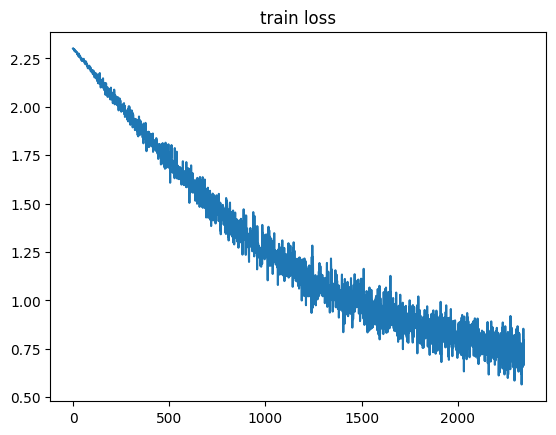

In [ ]:
train()

X shape: (100, 4)
y shape: (100, 1)
Done epoch 0; accuracy 0.380
Done epoch 1; accuracy 0.380
Done epoch 2; accuracy 0.380
Done epoch 3; accuracy 0.380
Done epoch 4; accuracy 0.700
Done epoch 5; accuracy 0.700
Done epoch 6; accuracy 0.700
Done epoch 7; accuracy 0.700
Done epoch 8; accuracy 0.700
Done epoch 9; accuracy 0.700
Done epoch 10; accuracy 0.700
Done epoch 11; accuracy 0.700
Done epoch 12; accuracy 0.700
Done epoch 13; accuracy 0.700
Done epoch 14; accuracy 0.700
Done epoch 15; accuracy 0.700
Done epoch 16; accuracy 0.700
Done epoch 17; accuracy 0.700
Done epoch 18; accuracy 0.700
Done epoch 19; accuracy 0.700
Done epoch 20; accuracy 0.700
Done epoch 21; accuracy 0.700
Done epoch 22; accuracy 0.700
Done epoch 23; accuracy 0.700
Done epoch 24; accuracy 0.700
Done epoch 25; accuracy 0.700
Done epoch 26; accuracy 0.700
Done epoch 27; accuracy 0.700
Done epoch 28; accuracy 0.700
Done epoch 29; accuracy 0.620
Done epoch 30; accuracy 0.620
Done epoch 31; accuracy 0.620
Done epoch 32;

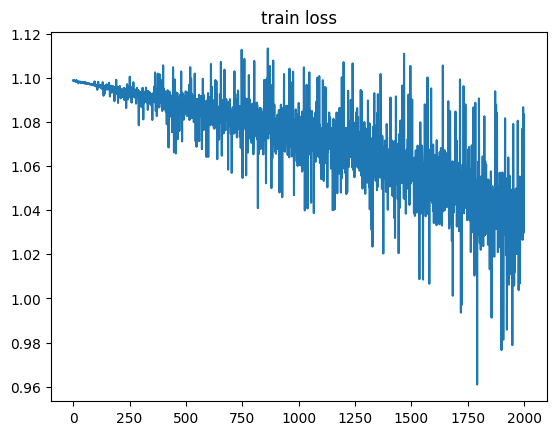

In [ ]:
hidden_dim = 20
l = 3
act_fnc = "tanh"
epoch = 500
batch_size = 32
train(dataset="iris")

# Update with Adam

In [ ]:
adam_params = {
    "beta1": 0.9,
    "beta2": 0.999,
    "decay": 0,
    "m": [0] * l,
    "v": [0] * l
}

# This code is based on the pseudocode in the official pytorch documents
# for further info, see https://pytorch.org/docs/stable/generated/torch.optim.Adam.html

def Adam(nn, grad, lr):
    # warning: you must reset `adam_params` at every training (i.e. m and v are set to 0s).
    # a better solution to not having to reset manually is to write a separate Adam class
    updated_nn = []
    for i, (W, g) in enumerate(zip(nn, grad)):
        assert W.shape == g.shape
        if adam_params["decay"] != 0:
            g = g + adam_params["decay"] * W
        adam_params["m"][i] = adam_params["m"][i] * adam_params["beta1"] + \
                           (1 - adam_params["beta1"]) * g
        adam_params["v"][i] = adam_params["beta2"] * adam_params["v"][i] + \
                           (1 - adam_params["beta2"]) * g**2
        m_bar = adam_params["m"][i] / (1-adam_params["beta1"])
        v_bar = adam_params["v"][i] / (1-adam_params["beta2"])
        # default not amsgrad
        W = W - lr * m_bar / (np.sqrt(v_bar) + 1e-6)
        updated_nn += [W]
    return updated_nn

X shape: (60000, 784)
y shape: (60000, 1)
Done epoch 0; accuracy 0.929
Done epoch 1; accuracy 0.940
Done epoch 2; accuracy 0.949
Done epoch 3; accuracy 0.957
Done epoch 4; accuracy 0.959


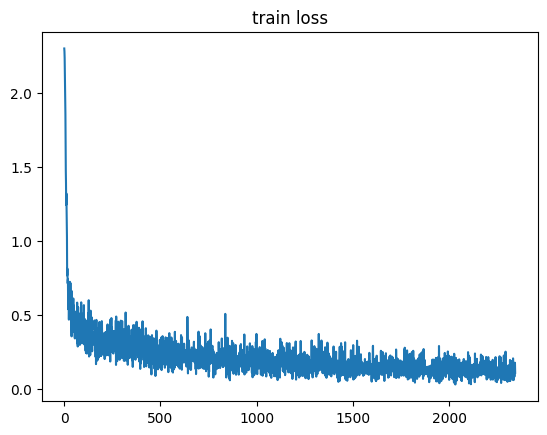

In [ ]:
l = 3 # number of layer
assert l >= 2

hidden_dim = 100
batch_size = 128
epoch = 5

act_fnc = 'relu'
train(optim=Adam)

TODO:


1.   Add Skip connections, then train with deeper networks (10, 20, 50 layers).
2.   Add Nesterov momentum.
3.   Add CNN (it might be helpful to take a look at `im2col` algorithm).
4.   Add RNN (very hard).



# Equivalent code using Pytorch
The above code can be implemented with ease in Pytorch

In [13]:
import torch
import torch.nn as nn

act_fnc_torch = {
    'relu': nn.ReLU,
    'tanh': nn.Tanh,
    'sigmoid': nn.Sigmoid
}

def create_nn_torch(input_dim, output_dim):
    # using small values of weights to avoid explosion
    net = [nn.Linear(input_dim, hidden_dim), act_fnc_torch[act_fnc]() ]
    for _ in range(l-2):
        net.append(nn.Linear(hidden_dim, hidden_dim))
        net.append(act_fnc_torch[act_fnc]())
    net.append(nn.Linear(hidden_dim, output_dim))
    return nn.Sequential(*net)

In [32]:
import matplotlib.pyplot as plt

device='cpu' if not torch.cuda.is_available() else "cuda:0"

def train_torch(dataset = "mnist", optim=torch.optim.SGD):
    (train_X, train_y), (test_X, test_y) = eval(dataset)()
    train_X = train_X.reshape(train_X.shape[0], -1).astype(float)
    train_y = train_y.reshape(train_y.shape[0], -1)
    test_X = test_X.reshape(test_X.shape[0], -1).astype(float)
    test_y = test_y.reshape(test_y.shape[0], -1)

    print("X shape:", train_X.shape)
    print("y shape:", train_y.shape)

    if dataset == "mnist":
        train_X = train_X / 128 - 1
        test_X = test_X / 128 - 1

    output_dim = None
    if dataset == "mnist": output_dim = 10
    if dataset == "iris": output_dim = 3

    assert output_dim, "unsupported dataset"

    n = train_X.shape[0]
    train_loss = []
    acc = []

    net = create_nn_torch(train_X.shape[-1], output_dim).to(device)
    optimizer = optim(net.parameters(), lr=1e-3)

    loss_fn = torch.nn.CrossEntropyLoss()

    test_X = torch.from_numpy(test_X.astype(np.float32)).to(device)
    test_y = torch.from_numpy(test_y).to(device)

    for i in range(epoch):
        indx = np.random.permutation(n)
        net.train()
        for j in range(0, n, batch_size):
            batch_X = train_X[indx[j:min(j+batch_size, n)]]
            batch_y = train_y[indx[j:min(j+batch_size, n)]]

            batch_X = torch.from_numpy(batch_X.astype(np.float32)).to(device)
            batch_y = torch.from_numpy(batch_y).to(device)

            optimizer.zero_grad()
            outputs = net(batch_X)

            loss = loss_fn(outputs, batch_y.squeeze())
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())
        # eval
        net.eval()
        with torch.no_grad():
            outputs = net(test_X).argmax(dim=-1).view(test_y.shape)
        acc.append((outputs == test_y).float().mean().item())
        print("Done epoch {}; accuracy {:.3f}".format(i, acc[-1]))
    plt.plot(train_loss)
    plt.title("train loss")
    plt.show()
    return train_loss

X shape: (60000, 784)
y shape: (60000, 1)
Done epoch 0; accuracy 0.290
Done epoch 1; accuracy 0.522
Done epoch 2; accuracy 0.561
Done epoch 3; accuracy 0.593
Done epoch 4; accuracy 0.656


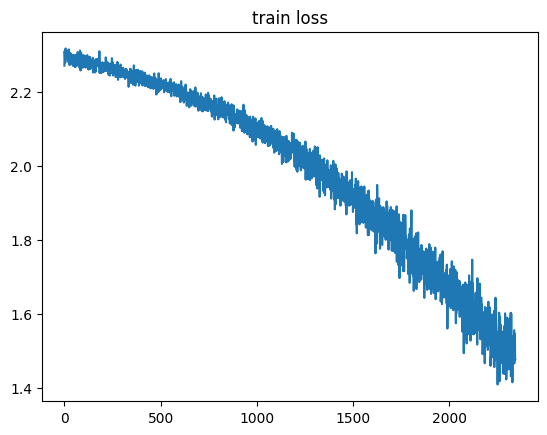

In [33]:
train_torch()

X shape: (60000, 784)
y shape: (60000, 1)
Done epoch 0; accuracy 0.927
Done epoch 1; accuracy 0.943
Done epoch 2; accuracy 0.958
Done epoch 3; accuracy 0.965
Done epoch 4; accuracy 0.966


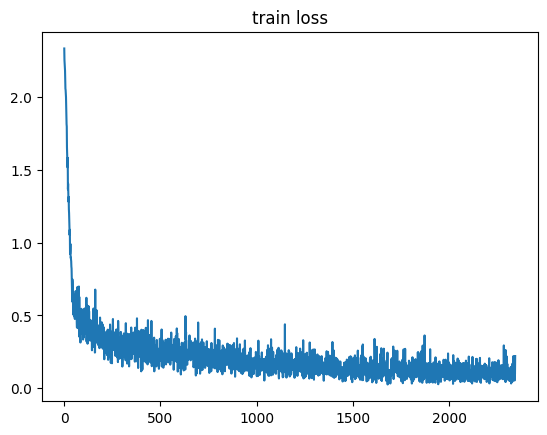

In [35]:
l = 3 # number of layer
assert l >= 2

hidden_dim = 100
batch_size = 128
epoch = 5

act_fnc = 'relu'
train_torch(optim=torch.optim.Adam)

You can compare the pytorch's results with the results run above in numpy, they look quite similar.